In [78]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Path to directory
import os
os.chdir('/content/drive/My Drive/Analytics India')

In [80]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('spx.csv', parse_dates=['date'], index_col='date')

In [82]:
#Split the data into train and test(90:10)
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

In [83]:
train.shape

(7372, 1)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train[['close']])
train['close'] = scaler.transform(train[['close']])
test['close'] = scaler.transform(test[['close']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [85]:
def create_dataset(X, y, time_steps=1):
    X1, y1 = [], []
    for i in range(len(X) - time_steps):
        t = X.iloc[i:(i + time_steps)].values
        X1.append(t)
        y1.append(y.iloc[i + time_steps])
    return np.array(X1), np.array(y1)

In [86]:
TIME_STEPS = 30
X_train, y_train = create_dataset(
  train[['close']],
  train.close,
  TIME_STEPS
)
X_test, y_test = create_dataset(
  test[['close']],
  test.close,
  TIME_STEPS
)
print(X_train.shape)

(7342, 30, 1)


**LSTM Architecture**

In [87]:
import keras
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64,
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(
  keras.layers.TimeDistributed(
    keras.layers.Dense(units=X_train.shape[2])
  )
)
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 30, 64)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 30, 64)            33024     
_________________________________________________________________
dropout_17 (Dropout)         (None, 30, 64)            0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, 30, 1)             65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
__________________________________________________

**Fitting the Model**

In [88]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/20
207/207 [==============================] - 8s 36ms/step - loss: 0.1778 - val_loss: 0.4079
Epoch 2/20
207/207 [==============================] - 7s 33ms/step - loss: 0.1001 - val_loss: 0.2973
Epoch 3/20
207/207 [==============================] - 7s 33ms/step - loss: 0.0770 - val_loss: 0.2506
Epoch 4/20
207/207 [==============================] - 7s 33ms/step - loss: 0.1020 - val_loss: 0.0806
Epoch 5/20
207/207 [==============================] - 7s 33ms/step - loss: 0.1142 - val_loss: 0.1789
Epoch 6/20
207/207 [==============================] - 7s 33ms/step - loss: 0.1319 - val_loss: 0.2268
Epoch 7/20
207/207 [==============================] - 7s 34ms/step - loss: 0.1264 - val_loss: 0.2452
Epoch 8/20
207/207 [==============================] - 7s 34ms/step - loss: 0.1327 - val_loss: 0.2794
Epoch 9/20
207/207 [==============================] - 7s 34ms/step - loss: 0.1318 - val_loss: 0.2915
Epoch 10/20
207/207 [==============================] - 7s 34ms/step - loss: 0.1298 - val_lo

**Evaluation**

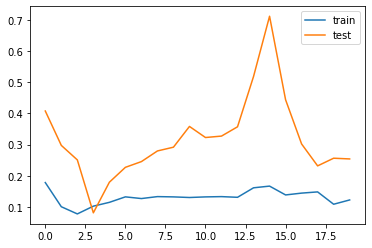

In [89]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [90]:
y_test

array([2.41861171, 2.46564501, 2.46903424, 2.48248718, 2.47963857,
       2.47552159, 2.48585561, 2.47595824, 2.43050519, 2.4705937 ,
       2.46500044, 2.43713809, 2.44616216, 2.4417333 , 2.45102768,
       2.41312241, 2.40686378, 2.37868954, 2.38049851, 2.43258447,
       2.44019463, 2.40952526, 2.38939783, 2.41405809, 2.4226871 ,
       2.46593611, 2.44254422, 2.46928375, 2.47209078, 2.43961243,
       2.42657535, 2.42487034, 2.33369393, 2.34506759, 2.37482208,
       2.37349134, 2.35681552, 2.38297285, 2.31090502, 2.32053209,
       2.37315865, 2.4209405 , 2.44038177, 2.43715888, 2.47227792,
       2.47716422, 2.48057424, 2.46171518, 2.45119402, 2.42624266,
       2.37945887, 2.35448672, 2.40773708, 2.43959164, 2.4397164 ,
       2.42975665, 2.41769682, 2.40788262, 2.42143953, 2.38758886,
       2.37513397, 2.4304636 , 2.38864929, 2.39276626, 2.38723538,
       2.40418151, 2.42684566, 2.41536803, 2.3793757 , 2.28813691,
       2.15331641, 1.99179797, 1.93856841, 2.0901479 , 2.18818

**Model Prediction**

In [91]:
pred = model.predict(X_test, verbose=0)
pred

array([[[2.1580467],
        [2.2224562],
        [1.6222627],
        ...,
        [1.8767393],
        [1.7912462],
        [1.8705808]],

       [[2.1544435],
        [2.2180266],
        [1.6199939],
        ...,
        [1.8723845],
        [1.7890016],
        [1.8662947]],

       [[2.1725898],
        [2.2411165],
        [1.6313701],
        ...,
        [1.8944705],
        [1.800784 ],
        [1.8880577]],

       ...,

       [[2.7204351],
        [2.9859562],
        [2.0242012],
        ...,
        [2.728125 ],
        [2.1167555],
        [2.7227678]],

       [[2.7091792],
        [2.968618 ],
        [2.0149634],
        ...,
        [2.713779 ],
        [2.1041322],
        [2.7085063]],

       [[2.7136645],
        [2.9760954],
        [2.0182934],
        ...,
        [2.718225 ],
        [2.1105535],
        [2.7128687]]], dtype=float32)